In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
import warnings
warnings.filterwarnings('ignore')

In [125]:
df=pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\ML Projects\Car price pred\carpricepred.csv")

In [126]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage kmpl/kg,Unnamed: 9,max_power bhp,Unnamed: 11,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,NaN,74.00,NaN,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,NaN,103.52,NaN,5.0


In [127]:
df.drop(['Unnamed: 9','Unnamed: 11'],inplace=True,axis=1)

In [128]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage kmpl/kg,max_power bhp,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,88.20,5.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   mileage kmpl/kg  7907 non-null   float64
 9   max_power bhp    7912 non-null   float64
 10  seats            7908 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 698.6+ KB


In [130]:
df['max_power bhp'].unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,     nan,
        67.   ,  82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,
        88.8  ,  83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,
        81.83 ,  40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,
        83.14 ,  67.05 , 168.5  , 100.   , 120.7  ,  98.63 , 175.56 ,
       103.25 , 171.5  , 100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,
        88.76 ,  86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 ,
       189.   ,  67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   ,
       120.   ,  94.68 , 160.   ,  65.   , 155.   ,  69.01 , 126.32 ,
       138.1  ,  83.8  , 126.2  ,  98.96 ,  62.1  ,  86.7  , 188.   ,
       214.56 , 177.   , 280.   , 148.31 , 254.79 , 190.   , 177.46 ,
       204.   , 141.   , 117.6  , 241.4  , 282.   , 150.   , 147.5  ,
       108.5  , 103.5  , 183.   , 181.04 , 157.7  , 164.7  ,  91.1  ,
       400.   ,  68.

In [131]:
df['max_power bhp']=df['max_power bhp'].fillna(df['max_power bhp'].mean())

In [132]:
df['mileage kmpl/kg'].unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59, 20.  ,
       19.01, 19.3 ,   nan, 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  ,
       25.5 , 26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 ,
       14.  , 18.6 , 33.44, 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 ,
       18.5 , 12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36,
       17.68, 14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  ,
       25.1 , 20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71,
       23.1 , 19.02, 19.81, 26.2 , 16.47, 15.04, 19.1 , 21.79, 18.8 ,
       21.21, 15.37, 11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32,
       21.9 , 14.53, 21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92,
       17.01, 22.37, 19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  ,
       13.96, 18.  , 12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 ,
       19.56, 22.69, 19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 ,
       19.44, 13.  , 21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 ,
       26.6 , 17.6 ,

In [133]:
df['mileage kmpl/kg']=df['mileage kmpl/kg'].fillna(df['mileage kmpl/kg'].mean())

In [134]:
df['seats'].unique()

array([ 5.,  4.,  6.,  7.,  8., nan,  9., 10., 14.,  2.])

In [135]:
df['seats']=df['seats'].fillna(df['seats'].mean())

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   mileage kmpl/kg  8128 non-null   float64
 9   max_power bhp    8128 non-null   float64
 10  seats            8128 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 698.6+ KB


In [137]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage kmpl/kg,max_power bhp,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,88.20,5.0


In [138]:
df.drop(['name'],axis=1,inplace=True)

In [139]:
df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage kmpl/kg,max_power bhp,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,103.52,5.0


In [140]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage kmpl/kg    0
max_power bhp      0
seats              0
dtype: int64

In [141]:
df.duplicated().sum()

1221

In [142]:
df.drop_duplicates(inplace=True)

In [143]:
df.shape

(6907, 10)

In [144]:
df.size

69070

In [145]:
df.describe()

,year,selling_price,km_driven,mileage kmpl/kg,max_power bhp,seats
count,6907.000000,6.907000e+03,6.907000e+03,6907.000000,6907.000000,6907.000000
mean,2013.416679,5.174456e+05,7.400715e+04,19.462988,87.860463,5.433948
std,4.080794,5.203562e+05,5.836081e+04,3.988998,31.314519,0.969585
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.950000,68.000000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.418783,81.860000,5.000000
75%,2017.000000,6.345000e+05,1.000000e+05,22.320000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,400.000000,14.000000


In [146]:
cat_col=df.select_dtypes('object')
num_col=df.select_dtypes('int64','float64')

In [147]:
cat_col.columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [148]:
num_col.columns

Index(['year', 'selling_price', 'km_driven'], dtype='object')

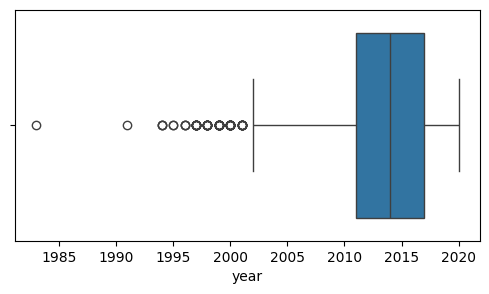

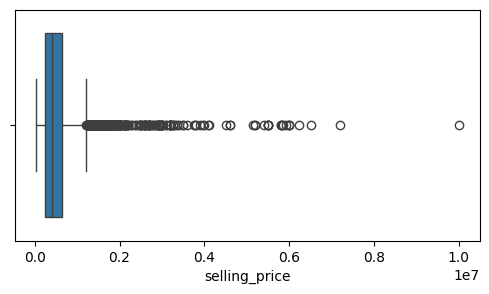

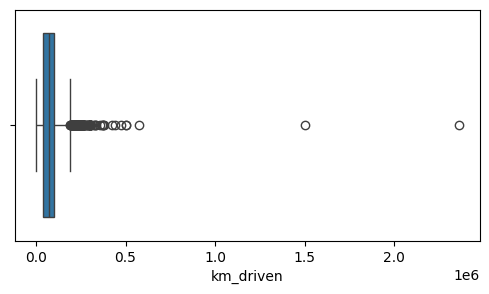

In [149]:
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.show()

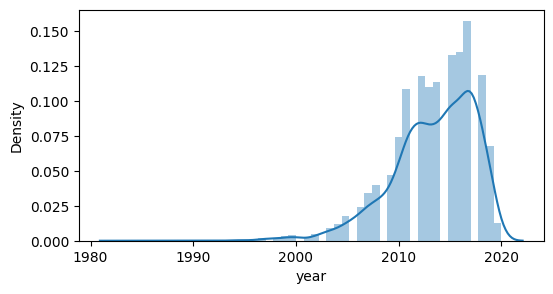

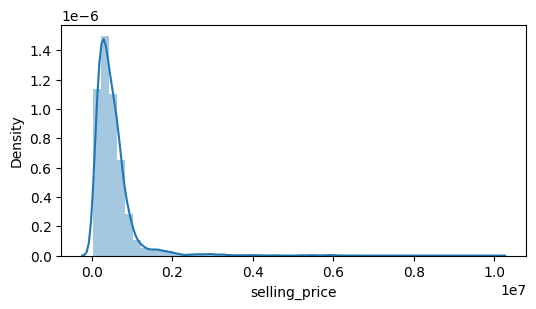

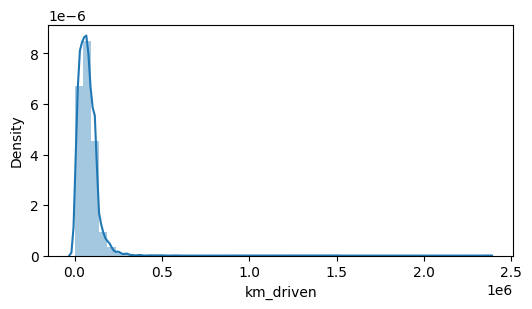

In [150]:
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.distplot(df[col])
    plt.show()